# Calling a topojson file of South Korea

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import operator

plt.xkcd()
korea=gpd.read_file('C:/LucyPark/seoul-maps-master/seoul-maps-master/juso/2015/json/skorea_provinces_geo.json')
#https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json
#위 주소에서 다운 가능함

In [2]:
korea['name']=korea['name'].replace(['제주특별자치도','세종특별자치시','울산광역시','대전광역시','광주광역시','인천광역시',\
                                     '대구광역시','부산광역시','서울특별시',],['제주도','세종시','울산시','대전시','광주시',\
                                     '인천시','대구시','부산시','서울시'])

# Making a test data set of voter turnout by 'do' (province)

In [3]:
votes={             #저는 자료가 없어 직접 만들었습니다
    '제주도':37.6,
    '경상남도':35.4,
    '경상북도':36.9,
    '전라남도':38.9,
    '전라북도':33.8,
    '충청남도':36.7,
    '충청북도':39.5,
    '강원도':35.6,
    '경기도':39.5,
    '세종시':38.3,
    '울산시':36.2,
    '대전시':40.2,
    '광주시':36.2,
    '인천시':35.8,
    '대구시':38.1,
    '부산시':36.6,
    '서울시':40.2}

# Making a DataFrame out of the dict 'votes' above

In [4]:
votes_df=pd.DataFrame(list(votes.items()),columns=['name', 'percent'])
votes_df.head(15)

,name,percent
0,제주도,37.6
1,경상남도,35.4
2,경상북도,36.9
3,전라남도,38.9
4,전라북도,33.8
5,충청남도,36.7
6,충청북도,39.5
7,강원도,35.6
8,경기도,39.5
9,세종시,38.3


# Merging two DataFrames

In [5]:
data_result=pd.merge(korea,votes_df,on='name')

# Making a column 'sum', showing 'Do:turnout'

In [6]:
data_result["sum"] = data_result["name"].map(str) +' : '+ data_result["percent"].map(str) +'%'
data_result.head()

,code,name,name_eng,base_year,geometry,percent,sum
0,39,제주도,Jeju-do,2013,(POLYGON ((126.2719873785377 33.10915891175797...,37.6,제주도 : 37.6%
1,38,경상남도,Gyeongsangnam-do,2013,"(POLYGON ((128.1859060460838 34.5540214293071,...",35.4,경상남도 : 35.4%
2,37,경상북도,Gyeongsangbuk-do,2013,(POLYGON ((129.4797893811307 35.69403279497205...,36.9,경상북도 : 36.9%
3,36,전라남도,Jeollanam-do,2013,(POLYGON ((126.9328334998792 33.98397494150027...,38.9,전라남도 : 38.9%
4,35,전라북도,Jeollabuk-do,2013,(POLYGON ((126.4303351419012 35.44492662586652...,33.8,전라북도 : 33.8%


# Activating Korean letters on matplotlib plots

In [7]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.TTF").get_name() #혁님이 요청하신 'HY고딕' 입니다!
rc('font', family=font_name)

# Plotting South Korea map with voter turnout

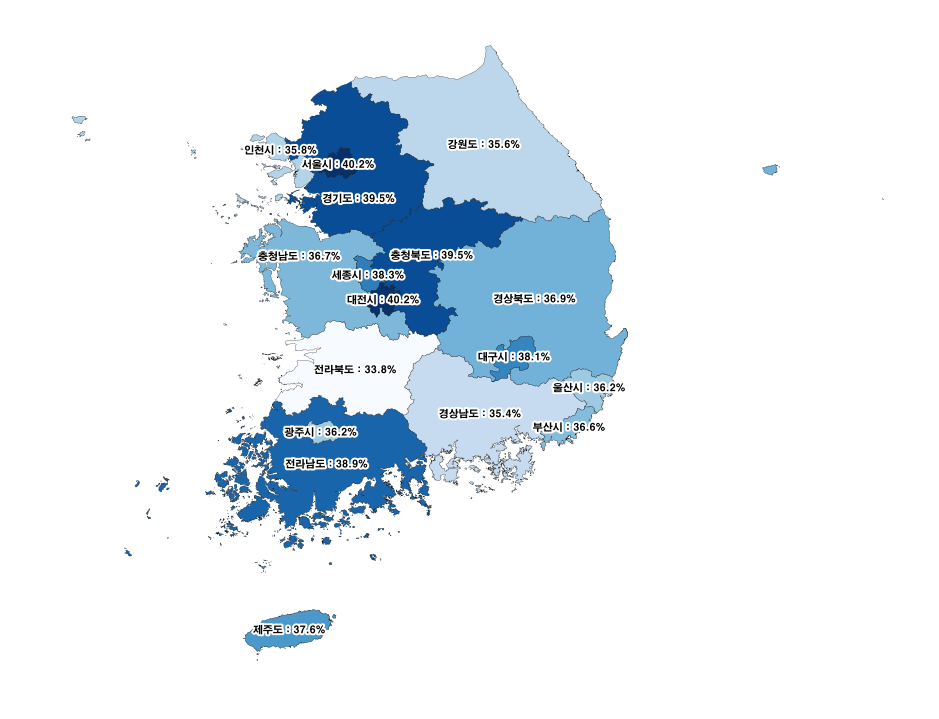

In [11]:
final_pic=data_result.plot( figsize=(16,16),linewidth=0.25, edgecolor='black', column='percent',cmap='Blues')

for index,row in data_result.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    if row['name'] == '경기도':
        xytext[0]=tuple(map(operator.add, xytext[0], (0,-0.3)))
    elif row['name'] == '인천시':
        xytext[0]=tuple(map(operator.add, xytext[0], (0.1,0.1)))
    elif row['name'] == '충청남도':
        xytext[0]=tuple(map(operator.add, xytext[0], (-0.2,0.2)))
    text=plt.annotate(row['sum'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')
    #text.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='red'))

plt.show()

# Saving the plot as a png file

In [13]:
seoul_fig=final_pic.get_figure()
seoul_fig.savefig('C:/Users/Jinoo/Pictures/geojson/korea_map517.png',transparent=True,bbox_inches='tight')

# Cropping the margin of the map

In [14]:
from PIL import Image
im=Image.open('C:/Users/Jinoo/Pictures/geojson/korea_map.png')
cropImage=im.crop((100,25,660,685))
cropImage.save('C:/Users/Jinoo/Pictures/geojson/cropped_korea23.png',transparent=True)